### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
# Read Ironore_price_market_index_test.csv File and store into Pandas data frame
commodity_to_load = "Resources/Ironore_price_market_index_test.csv"
purchase_data = pd.read_csv(commodity_to_load)
#purchase_data

In [2]:
#remove empty columns, fix naming error and bring Date in line with other dataframes
clean_data = purchase_data[['Date','Iron Price','Silver Price','Gold Price',' Copper Price','S&P GSCI Price']]
clean_data = clean_data.rename(columns={' Copper Price': 'Copper_Price',
                                       'Iron Price':'Iron_Price',
                                        'Silver Price':'Silver_Price',
                                        'Gold Price':'Gold_Price',
                                       'S&P GSCI Price':'S&P_GSCI_Price'})

clean_data['Date'] = clean_data['Date'].str[2:]
clean_data['Date'] = pd.to_datetime(clean_data['Date']).dt.to_period('Q')
clean_data

#save data to Commodities_clean.csv
clean_data.to_csv('Outputs/Commodities_clean.csv')

In [3]:
iron_data = clean_data[['Date','Iron_Price']]
iron_data.to_csv('Outputs/iron_data.csv')

In [4]:
#https://www.kaggle.com/docs/api
#https://stackoverflow.com/questions/64393520/r-not-working-as-lineterminator-within-python-csv-writer
# Read all_perth_310121.csv File and store into Pandas data frame
perth_to_load = "Resources/all_perth_310121.csv"

perth_data = pd.read_csv(perth_to_load)


In [5]:
#fix up Date_sold format errors and bring in line with other datasets
perth_data["DATE_SOLD"] = perth_data["DATE_SOLD"].str.replace('\r','')
perth_data["DATE_SOLD"] = pd.to_datetime(perth_data["DATE_SOLD"]).dt.to_period('Q')
perth_data

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,2018Q3,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,2019Q1,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,2015Q2,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,2018Q3,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,2016Q4,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,2016Q1,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,2017Q1,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,2017Q1,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,2016Q4,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


In [6]:
#Limit dataframe to variables of interest
clean_perth = perth_data[['SUBURB',
                          'PRICE',
                          'BEDROOMS',
                          'BATHROOMS',
                          'DATE_SOLD',
                          'POSTCODE']]
clean_perth = clean_perth.rename(columns={'DATE_SOLD': 'Date'})
#Add unique ID and add City for later merging with Sydney data
clean_perth.insert(0, 'ID', range(1, 1 + len(clean_perth)))
clean_perth['CITY'] = "Perth"
#clean_perth

In [7]:
#merge Perth data with Commodities data 
Perth_commodities_df = pd.merge(clean_data, clean_perth, on="Date",how="inner")
#Perth_commodities_df

In [8]:
#save data to perth_clean.csv
Perth_commodities_df.to_csv('Outputs/perth_housing.csv')

In [9]:
#Create Perth data frame with Iron ore prices
perth_iron_df = pd.merge(iron_data, clean_perth, on="Date",how="inner")
perth_iron_df.to_csv('Outputs/perth_iron_housing.csv')


In [10]:
# Read SydneyHousePrices.csv File and store into Pandas data frame
Sydney_to_load = "Resources/SydneyHousePrices.csv"
Sydney_data = pd.read_csv(Sydney_to_load)

In [11]:
#Add City indicator for when merged with Perth data
Sydney_data["CITY"] = "Sydney"
#sanity check to see earliest date
Sydney_data.sort_values(by=['Date'])


,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,CITY
92372,2000-12-01,92373,Bondi Beach,2026,3565000,10.0,5,3.0,house,Sydney
147100,2001-02-02,147101,Padstow,2211,960000,4.0,2,2.0,house,Sydney
20553,2001-03-13,20554,Allambie Heights,2100,896000,4.0,2,2.0,house,Sydney
75402,2001-04-06,75403,Cammeray,2062,463000,2.0,1,2.0,townhouse,Sydney
32743,2001-09-20,32744,Cremorne,2090,372000,2.0,1,1.0,house,Sydney
...,...,...,...,...,...,...,...,...,...,...
39731,2019-07-06,39732,Collaroy Plateau,2097,5350000,5.0,5,5.0,house,Sydney
165955,2019-07-06,165956,Annandale,2038,1955000,3.0,2,NaN,house,Sydney
149351,2019-07-06,149352,South Penrith,2750,555000,3.0,1,NaN,house,Sydney
67691,2019-07-06,67692,West Pennant Hills,2125,1682000,4.0,3,3.0,house,Sydney


In [12]:
#Change the Date from string to datetime then convert to desired format 
Sydney_data['Date'] = pd.to_datetime(Sydney_data['Date'], errors='coerce').dt.to_period('Q')

Sydney_data

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,CITY
0,2019Q2,1,Avalon Beach,2107,1210000,4.0,2,2.0,house,Sydney
1,2019Q2,2,Avalon Beach,2107,2250000,4.0,3,4.0,house,Sydney
2,2019Q2,3,Whale Beach,2107,2920000,3.0,3,2.0,house,Sydney
3,2019Q2,4,Avalon Beach,2107,1530000,3.0,1,2.0,house,Sydney
4,2019Q2,5,Whale Beach,2107,8000000,5.0,4,4.0,house,Sydney
...,...,...,...,...,...,...,...,...,...,...
199499,2014Q2,199500,Illawong,2234,1900000,5.0,3,7.0,house,Sydney
199500,2014Q2,199501,Illawong,2234,980000,4.0,3,2.0,house,Sydney
199501,2014Q2,199502,Alfords Point,2234,850000,4.0,2,2.0,house,Sydney
199502,2013Q3,199503,Illawong,2234,640000,3.0,2,2.0,townhouse,Sydney


In [13]:
#Rename columns matching Perth data to combine later
clean_Sydney = Sydney_data.rename(columns={'Id':'ID',
                          'suburb':'SUBURB',
                          'sellPrice':'PRICE',
                          'bed':'BEDROOMS',
                          'bath':'BATHROOMS',
                          'postalCode':'POSTCODE'})
clean_Sydney

,Date,ID,SUBURB,POSTCODE,PRICE,BEDROOMS,BATHROOMS,car,propType,CITY
0,2019Q2,1,Avalon Beach,2107,1210000,4.0,2,2.0,house,Sydney
1,2019Q2,2,Avalon Beach,2107,2250000,4.0,3,4.0,house,Sydney
2,2019Q2,3,Whale Beach,2107,2920000,3.0,3,2.0,house,Sydney
3,2019Q2,4,Avalon Beach,2107,1530000,3.0,1,2.0,house,Sydney
4,2019Q2,5,Whale Beach,2107,8000000,5.0,4,4.0,house,Sydney
...,...,...,...,...,...,...,...,...,...,...
199499,2014Q2,199500,Illawong,2234,1900000,5.0,3,7.0,house,Sydney
199500,2014Q2,199501,Illawong,2234,980000,4.0,3,2.0,house,Sydney
199501,2014Q2,199502,Alfords Point,2234,850000,4.0,2,2.0,house,Sydney
199502,2013Q3,199503,Illawong,2234,640000,3.0,2,2.0,townhouse,Sydney


In [14]:
#merge commodity prices with Sydney data
sydney_commodities_df = pd.merge(clean_data, clean_Sydney, on="Date",how="inner")
#sydney_commodities_df
#save data to sydney_clean.csv
sydney_commodities_df.to_csv('Outputs/sydney_housing.csv')

In [15]:
#Create Sydney data frame with Iron ore prices
sydney_iron_df = pd.merge(iron_data, clean_Sydney, on="Date",how="inner")
sydney_iron_df.to_csv('Outputs/sydney_iron_housing.csv')
sydney_iron_df

,Date,Iron_Price,ID,SUBURB,POSTCODE,PRICE,BEDROOMS,BATHROOMS,car,propType,CITY
0,2000Q4,12.45,92373,Bondi Beach,2026,3565000,10.0,5,3.0,house,Sydney
1,2000Q4,12.45,92373,Bondi Beach,2026,3565000,10.0,5,3.0,house,Sydney
2,2000Q4,12.45,92373,Bondi Beach,2026,3565000,10.0,5,3.0,house,Sydney
3,2001Q1,12.99,20554,Allambie Heights,2100,896000,4.0,2,2.0,house,Sydney
4,2001Q1,12.99,147101,Padstow,2211,960000,4.0,2,2.0,house,Sydney
...,...,...,...,...,...,...,...,...,...,...,...
598507,2019Q3,92.24,197646,Ruse,2560,692000,6.0,2,2.0,house,Sydney
598508,2019Q3,92.24,197647,Ambarvale,2560,549950,3.0,1,2.0,house,Sydney
598509,2019Q3,92.24,197648,St Helens Park,2560,539000,3.0,1,1.0,house,Sydney
598510,2019Q3,92.24,198931,Illawong,2234,1770000,4.0,2,6.0,house,Sydney


In [16]:
#combine Perth and Sydney data into one DataFrame
complete_city_df = pd.concat([clean_Sydney, clean_perth], ignore_index=True)
#limit variables to match eachother
complete_city_df = complete_city_df[[
                          'SUBURB',
                          'PRICE',
                          'BEDROOMS',
                          'BATHROOMS',
                          'Date',
                          'POSTCODE',
                           'CITY']]

#merge commodity prices with city data and add unique ID for each sale
complete_df = pd.merge(clean_data, complete_city_df, on="Date",how="inner")
complete_df.insert(0, 'ID', range(1, 1 + len(complete_df)))
complete_df

,ID,Date,Iron_Price,Silver_Price,Gold_Price,Copper_Price,S&P_GSCI_Price,SUBURB,PRICE,BEDROOMS,BATHROOMS,POSTCODE,CITY
0,1,2000Q1,12.45,5.26,283.30,5.26,"2,970.29",Bickley,165000,3.0,1,6076,Perth
1,2,2000Q1,12.45,5.26,283.30,5.26,"2,970.29",Mariginiup,196000,4.0,2,6078,Perth
2,3,2000Q1,12.45,5.26,283.30,5.26,"2,970.29",Mariginiup,190000,5.0,2,6078,Perth
3,4,2000Q1,12.45,5.26,283.30,5.26,"2,970.29",Mahogany Creek,98000,2.0,1,6072,Perth
4,5,2000Q1,12.45,5.26,283.30,5.26,"2,970.29",Mardella,235000,4.0,1,6125,Perth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
698833,698834,2020Q4,158.15,26.49,"1,891.10",26.49,"1,976.96",Ardross,995000,4.0,2,6153,Perth
698834,698835,2020Q4,158.15,26.49,"1,891.10",26.49,"1,976.96",Heathridge,412000,4.0,1,6027,Perth
698835,698836,2020Q4,158.15,26.49,"1,891.10",26.49,"1,976.96",Joondalup,300000,2.0,2,6027,Perth
698836,698837,2020Q4,158.15,26.49,"1,891.10",26.49,"1,976.96",Pearsall,422500,4.0,2,6065,Perth


In [17]:
#save data to complete_house_commodities.csv
complete_df.to_csv('Outputs/complete_house_commodities.csv')

In [18]:
iron_city_df = pd.concat([perth_iron_df, sydney_iron_df], ignore_index=True)
#limit variables to match eachother
iron_city_df = iron_city_df[['Date',
                             'Iron_Price',
                             'SUBURB',
                             'PRICE',
                             'BEDROOMS',
                             'BATHROOMS',
                             'POSTCODE',
                             'CITY']]
iron_city_df = iron_city_df[iron_city_df['Date'] >= '2007-01']
iron_city_df
iron_city_df.to_csv('Outputs/complete_house_iron.csv')


In [19]:
iron_city_df['BEDROOMS'].value_counts()
options = [2.0,3.0,4.0,5.0]

In [20]:
blank_df= pd.DataFrame(columns=['Date',
                             'Iron_Price',
                             'SUBURB',
                             'PRICE',
                             'BEDROOMS',
                             'BATHROOMS',
                             'POSTCODE',
                             'CITY'])
outlier_df = blank_df
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in options:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = iron_city_df['BEDROOMS'][iron_city_df['BEDROOMS']== x].quantile([0.25,0.5,0.75])
    
    lowq  = quartiles[0.25]
    highq = quartiles[0.75]
    in_quart_r = highq - lowq
    lower_b = (lowq - (1.5*in_quart_r))
    upper_b = (highq + (1.5*in_quart_r))
    
    single_drug_df = iron_city_df[iron_city_df['BEDROOMS'] == x].reset_index(drop=True)

    
    
    
print("potential outliers:")



potential outliers:


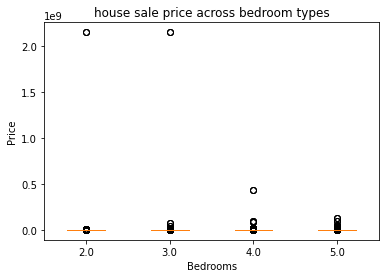

In [21]:
data = {}

for x in options:
    data[x] = iron_city_df[iron_city_df['BEDROOMS'] == x].reset_index(drop=True)

fig1, ax1 = plt.subplots()
ax1.set_title('house sale price across bedroom types')
dt = [data[2.0]['PRICE'],
      data[3.0]['PRICE'],
      data[4.0]['PRICE'],
      data[5.0]['PRICE']]
ax1.boxplot(dt)

plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.xticks([1,2,3,4],options)

plt.show()

Text(0.5, 1.0, 'house sale price across bedroom types')

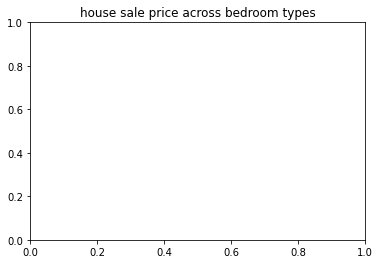

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('house sale price across bedroom types')

In [23]:
#create data drame of 3 bedroom houses
three_bed_df = iron_city_df[iron_city_df['BEDROOMS']==3]
three_bed_df.to_csv('Outputs/three_bed_housing.csv')

Text(0, 0.5, 'Price')

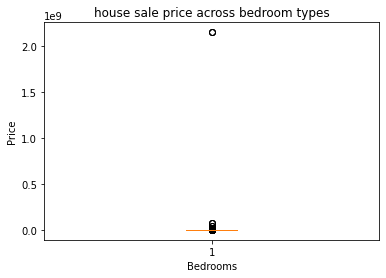

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('house sale price across bedroom types')
ax1.boxplot(three_bed_df["PRICE"])

plt.xlabel('Bedrooms')
plt.ylabel('Price')



In [25]:
#create data drame of 4 bedroom houses
four_bed_df = iron_city_df[iron_city_df['BEDROOMS']==4]

Text(0, 0.5, 'Price')

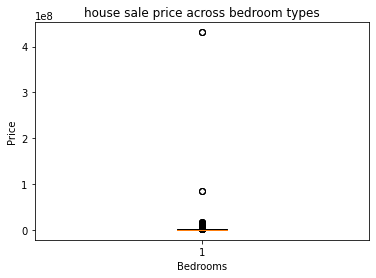

In [26]:
#create data drame of 4 bedroom 2 bathroom houses
four_bed_2bath_df = four_bed_df[four_bed_df['BATHROOMS']==2]
four_bed_2bath_df.to_csv('Outputs/four_bed_two_bath_housing.csv')

fig1, ax1 = plt.subplots()
ax1.set_title('house sale price across bedroom types')
ax1.boxplot(four_bed_2bath_df["PRICE"])

plt.xlabel('Bedrooms')
plt.ylabel('Price')


In [27]:
quartiles = four_bed_2bath_df['PRICE'].quantile([0.25,0.5,0.75])
    
lowq  = quartiles[0.25]
highq = quartiles[0.75]
in_quart_r = highq - lowq
lower_b = (lowq - (1.5*in_quart_r))
upper_b = (highq + (1.5*in_quart_r))

trim_4b_2bath_df = four_bed_2bath_df[four_bed_2bath_df["PRICE"] <= upper_b]


In [28]:
trim_4b_2bath_df.to_csv('Outputs/four_bed_two_bath_housing.csv')

In [29]:
print(lowq,highq,in_quart_r,lower_b,upper_b)

650000.0 1320000.0 670000.0 -355000.0 2325000.0


In [30]:
upper_b

2325000.0

Text(0, 0.5, 'Price')

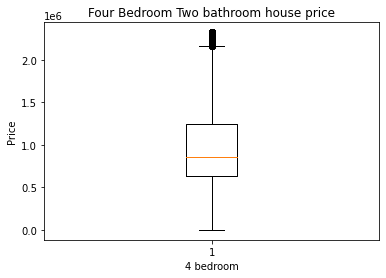

In [31]:
fig1, ax1 = plt.subplots()
ax1.set_title('Four Bedroom Two bathroom house price')
ax1.boxplot(trim_4b_2bath_df["PRICE"])

plt.xlabel('4 bedroom')
plt.ylabel('Price')

In [32]:
y2007 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2007-01') & (trim_4b_2bath_df["Date"] <= '2007-12')]['PRICE']
y2008 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2008-01') & (trim_4b_2bath_df["Date"] <= '2008-12')]['PRICE']
y2009 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2009-01') & (trim_4b_2bath_df["Date"] <= '2009-12')]['PRICE']
y2010 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2010-01') & (trim_4b_2bath_df["Date"] <= '2010-12')]['PRICE']
y2011 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2011-01') & (trim_4b_2bath_df["Date"] <= '2011-12')]['PRICE']
y2012 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2012-01') & (trim_4b_2bath_df["Date"] <= '2012-12')]['PRICE']
y2013 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2013-01') & (trim_4b_2bath_df["Date"] <= '2013-12')]['PRICE']
y2014 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2014-01') & (trim_4b_2bath_df["Date"] <= '2014-12')]['PRICE']
y2015 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2015-01') & (trim_4b_2bath_df["Date"] <= '2015-12')]['PRICE']
y2016 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2016-01') & (trim_4b_2bath_df["Date"] <= '2016-12')]['PRICE']
y2017 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2017-01') & (trim_4b_2bath_df["Date"] <= '2017-12')]['PRICE']
y2018 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2018-01') & (trim_4b_2bath_df["Date"] <= '2018-12')]['PRICE']
y2019 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2019-01') & (trim_4b_2bath_df["Date"] <= '2019-12')]['PRICE']

In [33]:
data = [y2007,
        y2008,
        y2009,
        y2010,
        y2011,
        y2012,
        y2013,
        y2014,
        y2015,
        y2016,
        y2017,
        y2018,
        y2019] 

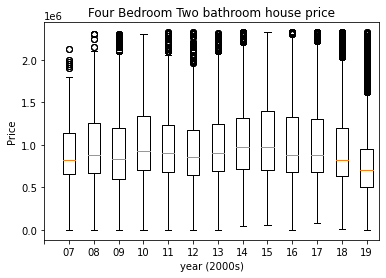

In [34]:
#trim_4b_2bath_df["Date"] = pd.to_datetime(trim_4b_2bath_df["Date"]).dt.to_period('M')

fig1, ax1 = plt.subplots()
ax1.set_title('Four Bedroom Two bathroom house price')
#                 clean_data[(clean_data['Date'] >= '2007-01') & (clean_data['Date'] <= '2019-06')]
ax1.boxplot(data)

plt.xlabel('year (2000s)')
plt.ylabel('Price')
plt.xticks(np.arange(14),["",'07','08','09','10','11','12','13','14','15','16','17','18','19'])
plt.show()

In [35]:
p2007 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2007-01') & (trim_4b_2bath_df["Date"] <= '2007-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2008 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2008-01') & (trim_4b_2bath_df["Date"] <= '2008-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2009 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2009-01') & (trim_4b_2bath_df["Date"] <= '2009-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2010 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2010-01') & (trim_4b_2bath_df["Date"] <= '2010-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2011 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2011-01') & (trim_4b_2bath_df["Date"] <= '2011-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2012 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2012-01') & (trim_4b_2bath_df["Date"] <= '2012-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2013 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2013-01') & (trim_4b_2bath_df["Date"] <= '2013-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2014 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2014-01') & (trim_4b_2bath_df["Date"] <= '2014-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2015 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2015-01') & (trim_4b_2bath_df["Date"] <= '2015-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2016 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2016-01') & (trim_4b_2bath_df["Date"] <= '2016-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2017 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2017-01') & (trim_4b_2bath_df["Date"] <= '2017-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2018 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2018-01') & (trim_4b_2bath_df["Date"] <= '2018-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
p2019 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2019-01') & (trim_4b_2bath_df["Date"] <= '2019-12') & (trim_4b_2bath_df["CITY"] == 'Perth')]['PRICE']
s2007 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2007-01') & (trim_4b_2bath_df["Date"] <= '2007-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2008 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2008-01') & (trim_4b_2bath_df["Date"] <= '2008-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2009 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2009-01') & (trim_4b_2bath_df["Date"] <= '2009-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2010 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2010-01') & (trim_4b_2bath_df["Date"] <= '2010-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2011 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2011-01') & (trim_4b_2bath_df["Date"] <= '2011-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2012 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2012-01') & (trim_4b_2bath_df["Date"] <= '2012-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2013 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2013-01') & (trim_4b_2bath_df["Date"] <= '2013-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2014 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2014-01') & (trim_4b_2bath_df["Date"] <= '2014-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2015 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2015-01') & (trim_4b_2bath_df["Date"] <= '2015-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2016 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2016-01') & (trim_4b_2bath_df["Date"] <= '2016-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2017 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2017-01') & (trim_4b_2bath_df["Date"] <= '2017-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2018 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2018-01') & (trim_4b_2bath_df["Date"] <= '2018-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']
s2019 = trim_4b_2bath_df[(trim_4b_2bath_df["Date"]>= '2019-01') & (trim_4b_2bath_df["Date"] <= '2019-12') & (trim_4b_2bath_df["CITY"] == 'Sydney')]['PRICE']

In [36]:
data2 = [p2007,
        p2008,
        p2009,
        p2010,
        p2011,
        p2012,
        p2013,
        p2014,
        p2015,
        p2016,
        p2017,
        p2018,
        p2019,
        s2007,
        s2008,
        s2009,
        s2010,
        s2011,
        s2012,
        s2013,
        s2014,
        s2015,
        s2016,
        s2017,
        s2018,
        s2019] 

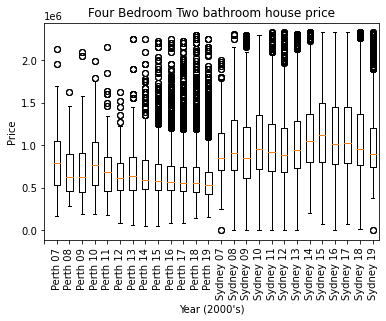

In [37]:
#trim_4b_2bath_df["Date"] = pd.to_datetime(trim_4b_2bath_df["Date"]).dt.to_period('M')

fig1, ax1 = plt.subplots()
ax1.set_title('Four Bedroom Two bathroom house price')
#                 clean_data[(clean_data['Date'] >= '2007-01') & (clean_data['Date'] <= '2019-06')]
ax1.boxplot(data2)

plt.xlabel("Year (2000's)")
plt.ylabel('Price')
plt.xticks(np.arange(27),["",'Perth 07','Perth 08','Perth 09','Perth 10','Perth 11','Perth 12','Perth 13','Perth 14','Perth 15','Perth 16','Perth 17','Perth 18','Perth 19',
                          'Sydney 07','Sydney 08','Sydney 09','Sydney 10','Sydney 11','Sydney 12','Sydney 13','Sydney 14','Sydney 15','Sydney 16','Sydney 17','Sydney 18','Sydney 19'],rotation='vertical' )
plt.show()